<div class="alert alert-success">
Hey Rena!
    
    
Such an amazing job! Frankly speaking, I am truly impressed by the progress that you've made. Your best performing model does great job. I would definitely like to take this model and move it to production, since it seems to be so good in churn prediction. Business will benefit a lot from having it.
    
    
The report is clear and neat. Each step is very well explained and described. I ended up with no questions at all after reading it.
    
    
My congratulations on the completion of the program! Your skills now are impressive! Pls, text me when you get a job offer, so we can congratulate it together ;)
</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job! The code is accepted. Based on your best model's ROC-AUC, you've got 6 SP. Congratulations!

<div class="alert alert-info" role="alert">
Dear Reviewer, 
    
<br>Thank you for reviewing my work plan. 
<br>Since this is a work plan, please note that the end project file that I will present may differ from this initial plan as I face the need to make modifications as I discover new facts during modelling and optimisation. Thank you for your understanding. 
       
<br>Rena Bracha
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Sure, that makes sense!

</div>

## Main Assignment Conditions

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

### Interconnect's Services

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously (*MultipleLines*).
2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable (*InternetService*).

Some other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract (*PaymentMethod*). They can use various payment methods and receive an electronic invoice after a transaction.

### Data Description

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

[final_provider.zip](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/ac39c23b-718e-4cd6-bdaa-85b3a127a457/final_provider.zip) [Rena] The link is broken.

The data is also located on the platform in the `/datasets/final_provider/` folder. [Rena] After downloading the content of the csv files to dataframes, downloading the content of the dataframes to a local directory or to a google drive folder is unsuccessful. 


### Project Plan

1. Getting the data.
2. Preparing the data. 
3. Building the models.
4. Conclusion


**Project Interpretation**
InterConnect is interested in a preemptive measure of discerning a potential risk of losing a customer in order to maintain the retention rate. Using existing customer data, we will build a machine learning model to predict the likelihood of a customer churning. 

We are trying to predict ‘to churn or not to churn’ using existing data, so we are going to define this as a binary classification problem and attempt to solve it with a supervised learning method. 

**Potential Solutions and Evaluation Metrics**

We would like to keep things simple so we can explain to the management. Our first option will be:
* Logistic Regression: the model is highly interpretable, meaning we can see the relationship between the features and the output more easily than in other models. 

We will use AUC-ROC as the primary evaluation metric. We will see if adjusting the decision threshold on the ROC curve will allow us to find a balance in the trade-off between the TPR and FPR and achieve an optimal classification performance. 
We will also supplement it by an additional metric of Accuracy.
 
 
The simplicity of the logistic regression model comes with the shortcoming that its decision boundary is linear. If our data do not conform to classification by a linear boundary, the model will not be a good fit and, therefore, will not perform well.

We will, therefore, build more than one model, compare their performances and choose the one with the highest prediction accuracy and best AUC-ROC score in the end. Our backup options will be:

* Gradient Boosting: since we have imbalanced data, a sequential process where the model will focus more on the incorrectly predicted data points at each next step may be a good tactic. There are no outliers detected in the dataset, so the model will not be affected. 
* Random Forest: the tree-based ensemble model is robust to outliers if there are any, does not need feature scaling and generally enjoys the reputation of performing well in binary classification problems. 
* CatBoost: the gradient boosted decision-tree model also shows robustness towards outliers and unscaled data, as well as the ability to handle “string” categorical variables by encoding them under the hood. Processing data and making them conform to all sorts of statistical properties to circumvent the limitations of our machine models is bound to introduce human errors. It is better to be able to accept real-world data as they are in their closest natural form. It, too, is well-known to show good performance in binary classification problems among others.

## Loading Data

In [2]:
!pip install sidetable
!pip install seaborn==0.11
!pip install lightgbm
!pip install -U catboost
!pip install optuna
!pip install -U imbalanced-learn
!pip install xgboost
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 1.7 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 283 kB 2.3 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 76.1 MB 56 kB/s s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 308 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 3.5 MB/s  eta 0:00:01
     |████████████████████████████████| 149 kB 21.5 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 2.9 MB/s  eta 0:00:01
     |████████████████████████████████| 113 kB 18.8 MB/s eta 0:00:01
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-n

In [3]:
import pandas as pd
import numpy as np
import glob
import os
import sidetable as stb
import time
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns # '0.11.0'

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE, SMOTENC

from sklearn.dummy import DummyClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.base import TransformerMixin
from sklearn.svm import SVC
from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.pipeline import Pipeline
import optuna

from catboost import Pool, CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from graphviz import Digraph

In [4]:
files = glob.glob('/datasets/final_provider/*.csv*', recursive = True)

# verify the file sizes are small enough to load all the rows
for i in range(len(files)):
    file_size = os.path.getsize(files[i])/1000
    print("File Size is :", file_size, "KB")
    
df_list = []
for i in range(len(files)):
    name = f"df_{os.path.basename(files[i]).replace('.csv', '')}"
    globals()[name] = pd.read_csv(files[i], sep=',')
    df_list.append(name)

dfs_list = [df_internet, df_phone, df_personal, df_contract]

# check what the data look like and what their data types are
for i in range(len(dfs_list)):
    print(df_list[i])
    print(dfs_list[i].sample(2))
    print('-'*50)
    
for i in range(len(dfs_list)):
    print(df_list[i])
    print(dfs_list[i].info())
    print('-'*50)
    
# merge the four dataframes by 'customerID'
data = df_personal.merge(df_contract, how="left", on="customerID") \
    .merge(df_phone, how="left", on="customerID") \
    .merge(df_internet, how="left", on="customerID")    

File Size is : 221.294 KB
File Size is : 92.05 KB
File Size is : 181.571 KB
File Size is : 545.798 KB
df_internet
      customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
4056  7566-DSRLQ     Fiber optic             No          Yes              Yes   
4109  2495-KZNFB     Fiber optic            Yes           No               No   

     TechSupport StreamingTV StreamingMovies  
4056         Yes         Yes             Yes  
4109          No          No             Yes  
--------------------------------------------------
df_phone
      customerID MultipleLines
3669  1485-YDHMM           Yes
5771  6368-TZZDT            No
--------------------------------------------------
df_personal
      customerID  gender  SeniorCitizen Partner Dependents
1034  8146-QQKZH  Female              0     Yes         No
6253  6128-DAFVY  Female              0      No         No
--------------------------------------------------
df_contract
      customerID   BeginDate EndDate         

<div class="alert alert-success">
<b>Reviewer's comment</b>

Dataframes were merged correctly, so the data on customers who don't use all kinds of services is not lost

</div>

Note: there are no missing values in any of the four dataframes. 

In [7]:
try:
    data = pd.read_csv('./datasets/data.csv', sep=',', index_col=[0])
    df_contract = pd.read_csv('./datasets/contract.csv', sep=',', index_col=[0])
    df_contract.reset_index(level=0, inplace=True)
except:
    files = glob.glob('/datasets/final_provider/*.csv*', recursive = True)
    for i in range(len(files)):
        name = f"df_{os.path.basename(files[i]).replace('.csv', '')}"
        globals()[name] = pd.read_csv(files[i], sep=',')
    data = df_personal.merge(df_contract, how="left", on="customerID") \
    .merge(df_phone, how="left", on="customerID") \
    .merge(df_internet, how="left", on="customerID")

## EDA

Take a look at the data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


In [9]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5011,9699-UBQFS,Female,1,Yes,No,2016-07-01,No,Month-to-month,Yes,Electronic check,94.50,4156.8,Yes,Fiber optic,Yes,Yes,No,No,Yes,No
91,2424-WVHPL,Male,1,No,No,2020-01-01,No,Month-to-month,No,Electronic check,74.70,74.7,No,Fiber optic,No,No,No,Yes,No,No
5998,0442-TDYUO,Male,0,Yes,No,2016-02-01,No,Two year,Yes,Mailed check,20.05,1036,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4160,5049-MUBWG,Male,0,No,No,2017-12-01,No,One year,No,Bank transfer (automatic),75.00,1908.35,No,DSL,Yes,No,No,Yes,Yes,Yes
940,0835-DUUIQ,Female,0,No,Yes,2018-02-01,No,One year,No,Bank transfer (automatic),21.05,531.55,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Look at the unique values. 

In [10]:
for c in data.columns:
    print('Column:', c, '- unique values:', data[c].unique())

Column: customerID - unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - unique values: ['Female' 'Male']
Column: SeniorCitizen - unique values: [0 1]
Column: Partner - unique values: ['Yes' 'No']
Column: Dependents - unique values: ['No' 'Yes']
Column: BeginDate - unique values: ['2020-01-01' '2017-04-01' '2019-10-01' '2016-05-01' '2019-09-01'
 '2019-03-01' '2018-04-01' '2019-04-01' '2017-07-01' '2014-12-01'
 '2019-01-01' '2018-10-01' '2015-04-01' '2015-09-01' '2018-01-01'
 '2014-05-01' '2015-10-01' '2014-03-01' '2018-05-01' '2019-11-01'
 '2019-02-01' '2016-01-01' '2017-08-01' '2015-12-01' '2014-02-01'
 '2018-06-01' '2019-12-01' '2017-11-01' '2019-06-01' '2016-04-01'
 '2017-02-01' '2018-12-01' '2014-04-01' '2018-09-01' '2014-11-01'
 '2016-07-01' '2015-02-01' '2018-07-01' '2014-08-01' '2016-03-01'
 '2018-08-01' '2014-10-01' '2015-06-01' '2016-08-01' '2019-05-01'
 '2017-03-01' '2016-02-01' '2017-09-01' '2014-09-01' '2017-1

Origin: personal.csv
* 'customerID': a unique code assigned to each client
* 'gender': the sex of the customer ('Female', 'Male')
* 'SeniorCitizen': whether the customer is a UB40 or not ('Yes', 'No')
* 'Partner': whether the customer has a partner or not ('Yes', 'No')
* 'Dependents'" whether the customer has dependends or not ('Yes', 'No')

Origin: contract.csv
* 'BeginDate': the start date of the contract (date in YYYY-MM-DD)
* 'EndDate': the end date of the contract if a customer churned else 'No' (date and time in YYYY-MM-DD HH:MM:SS, 'No')
* 'Type': the customer's contract type ('Month-to-month', 'One year', 'Two year')
* 'PaperlessBilling': whether the customer subscribes to paperless billing or not ('Yes', 'No')
* 'PaymentMethod': how the customer is billed ('Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)')
* 'MonthlyCharges': the amount that the customer is charged monthly (a numeric value)
* 'TotalCharges': the totla amount that the customer is charged since the beginning of the contract (a numeric value)

Origin: phone.csv
* 'MultipleLines': whether the customer has multiple lines or not (nan, 'No', 'Yes') - 'nan' indicates that the customer does not subscribe to the InterConnect phone service.

Origin: internet.csv
* 'InternetService': whether the customer subsribes to the internet service or not ('DSL', 'Fiber optic', nan)
* 'OnlineSecurity': whether the customer subscribes to the online security service or not ('No', 'Yes', nan)
* 'OnlineBackup': whether the customer subscribes to the online backup service or not ('No', 'Yes', nan)
* 'DeviceProtection': whether the customer subsribes to the device protection service or not ('No', 'Yes', nan)
* 'TechSupport': whether the customer can receive the technical support service or not ('No', 'Yes', nan)
* 'StreamingTV': whether the customer subsribes to the streaming TV service or not ('No', 'Yes', nan)
* 'StreamingMovies': whether the customer subscribes to the streaming movies service ('No', 'Yes', nan)

Note: 'nan' indicates that the customer does not subscribe to InterConnect's internet service.

Check for missing values. If any, fill them before the columns are converted into 'category' to avoid the error message about non-existing categorical values.

Note: the table below shows only the relevant rows.

In [11]:
data.stb.missing().head(8)

,missing,total,percent
StreamingMovies,1526,7043,21.666903
StreamingTV,1526,7043,21.666903
TechSupport,1526,7043,21.666903
DeviceProtection,1526,7043,21.666903
OnlineBackup,1526,7043,21.666903
OnlineSecurity,1526,7043,21.666903
InternetService,1526,7043,21.666903
MultipleLines,682,7043,9.683374


* 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity': 'NaN' means the customer does not subscribe to the company's internet service and therefore does not subsribe to these said services either. 

We can fill the missing values with a 'No' and convert the variables to 'int'.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Yep, exactly!

</div>

In [12]:
not_subscribed = ['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity']
for col in not_subscribed:
    data[col] = (data[col] == 'Yes').astype('int').fillna(0)

* 'MultipleLines': 'Yes' means a customer has multiple lines; 'No' means a customer does not have multiple lines (perhaps has a single line); 'NaN' suggests that a customer does not subsribe to InterConnect's phone service. 

In [13]:
data = data.rename(columns={'MultipleLines': 'Phone'})
data['Phone'] = data['Phone'].map({'Yes': 'Multiple lines', 'No': 'Single line'}).fillna('No phone service')

* 'TotalCharges': this is of 'object' data type. This suggests that the column contains values other than the 'float' type values - it in fact contains a space. 

Let us convert the column to a numerical type and filter out those rows containing a NaN by making use of the original data from contract.csv, which contained no missing values. 

In [14]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.stb.missing().head(1)

,missing,total,percent
InternetService,1526,7043,21.666903


In [15]:
customers = data[data['TotalCharges'].isna()]['customerID'].to_list()
df_contract[df_contract['customerID'].isin(customers)]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


The Project Instruction contains the caveat, "The contract information is valid as of February 1, 2020". The customers who started their contract on '2020-02-01' have no 'TotalCharges' information yet. 

Therefore, the missing values can be filled with a zero. 

In [16]:
data['TotalCharges'].fillna(0.0, inplace = True)

Now that we have no more missing values in the dataset, we will perform some data type conversion. 

* 'BeginDate': convert from 'object' to 'datetime'.
* 'EndDate': create a copy 'EndDate2' and replace all the "No's" with '2020-02-01', and convert from 'object' to 'datetime'. These customers are still with Telecom as of February 1, 2020. As for the original column, rename it to 'Churned' for ease of understanding, and replace the date and time values with "Yes's" to turn this into binary classification problem that will be solved by supervised learning.
* Add a new column 'Tenure' to calculate the tenure (how long a customer has a contract) from 'EndDate2' and 'BeginDate' in the unit of months.
* 'gender', 'Partner', 'Dependents', 'PaperlessBilling': these variables have two unique values. Convert from 'object' to 'int'. This will reduce memory usage and have an effect of speeding up the performance of some models we may be using (e.g. LightGBM), and widens our choice of algorithms to include those do not have a built-in mechanism for handling string" categorical variables under the hood (e.g. LogisticRegression).
* 'Type', 'PaymentMethod', 'InternetService': these variables have three unique values. Convert from 'object' to 'category'. We will decide how to set the numerical values during the EDA.


Note: we will not be converting the feature names to lowercase, each word separated by an underscore. It is only a nice-to-have extra step that does not have a large contribution to the whole process.

In [17]:
data['EndDate2'] = ['2020-02-01' if x == 'No' else x for x in data['EndDate']]
data[['EndDate2', 'BeginDate']] = data[['EndDate2', 'BeginDate']].apply(pd.to_datetime)
data['Tenure'] = (data['EndDate2'] - data['BeginDate']).dt.days

data['EndDate'] = [1 if x != 'No' else 0 for x in data['EndDate']]
data.rename(columns = {'EndDate': 'Churned'}, inplace = True)

to_binary = ['gender', 'Partner', 'Dependents', 'PaperlessBilling']
for col in to_binary:
    data[col] = data[col].map({'Yes': 1, 'No': 0, 
                              'Male': 1, 'Female': 0})
    
to_category = ['Type', 'PaymentMethod', 'InternetService', 'Phone'] 
for col in to_category:
    data[col] = data[col].fillna('No').astype('category')

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, the preprocessing looks good!

</div>

Look at the target variable. 

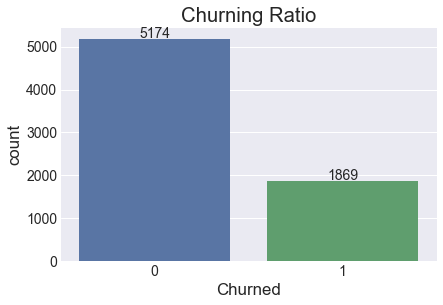

In [18]:
plt.figure(figsize=(6,4))
plots = sns.countplot(data['Churned'])

# annotate the bars
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center', 
                   xytext=(0, 5),
                   textcoords='offset points')

    plt.title("Churning Ratio")
plt.show();

* There are 2.5 times as many customers who churned as those who did as of February 01, 2020. This is a moderate class imbalance, and does not warrant data augmentation such as downsampling. To achieve a good model performance, however, we will relate to the class imbalance in few ways. 

In [19]:
data[['BeginDate', 'EndDate2', 'MonthlyCharges', 'TotalCharges', 'Tenure']].describe(include='all')

,BeginDate,EndDate2,MonthlyCharges,TotalCharges,Tenure
count,7043,7043,7043.000000,7043.000000,7043.000000
unique,77,5,NaN,NaN,NaN
top,2014-02-01 00:00:00,2020-02-01 00:00:00,NaN,NaN,NaN
freq,366,5174,NaN,NaN,NaN
first,2013-10-01 00:00:00,2019-10-01 00:00:00,NaN,NaN,NaN
last,2020-02-01 00:00:00,2020-02-01 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,64.761692,2279.734304,985.996166
std,NaN,NaN,30.090047,2266.794470,747.587844
min,NaN,NaN,18.250000,0.000000,0.000000
25%,NaN,NaN,35.500000,398.550000,273.000000


* We have data for the period between 2013-10 and 2020-02.
* The highest number of customers were acquisitioned on 2014-02.
* Average customers stay with InterConnect for 32 months, and pay 64 currency units monthly (which translates to an average total of 2280 currency units).


<br>We will make the split to training and test datasets so there will be no data leakage during the EDA. 'customerID', 'BeginDate' and 'EndDate2' will be dropped at this point since the first variable does not offer useful information to models' learning process, and the latter two are redundant since the information is expressed in 'Tenure'. 

Drop the irrelevant columns that do not offer useful information.

In [20]:
data = data.drop(['BeginDate', 'EndDate2', 'customerID'], axis=1)

Let us check the distribution of all the feature variables with respect to the target variable. 

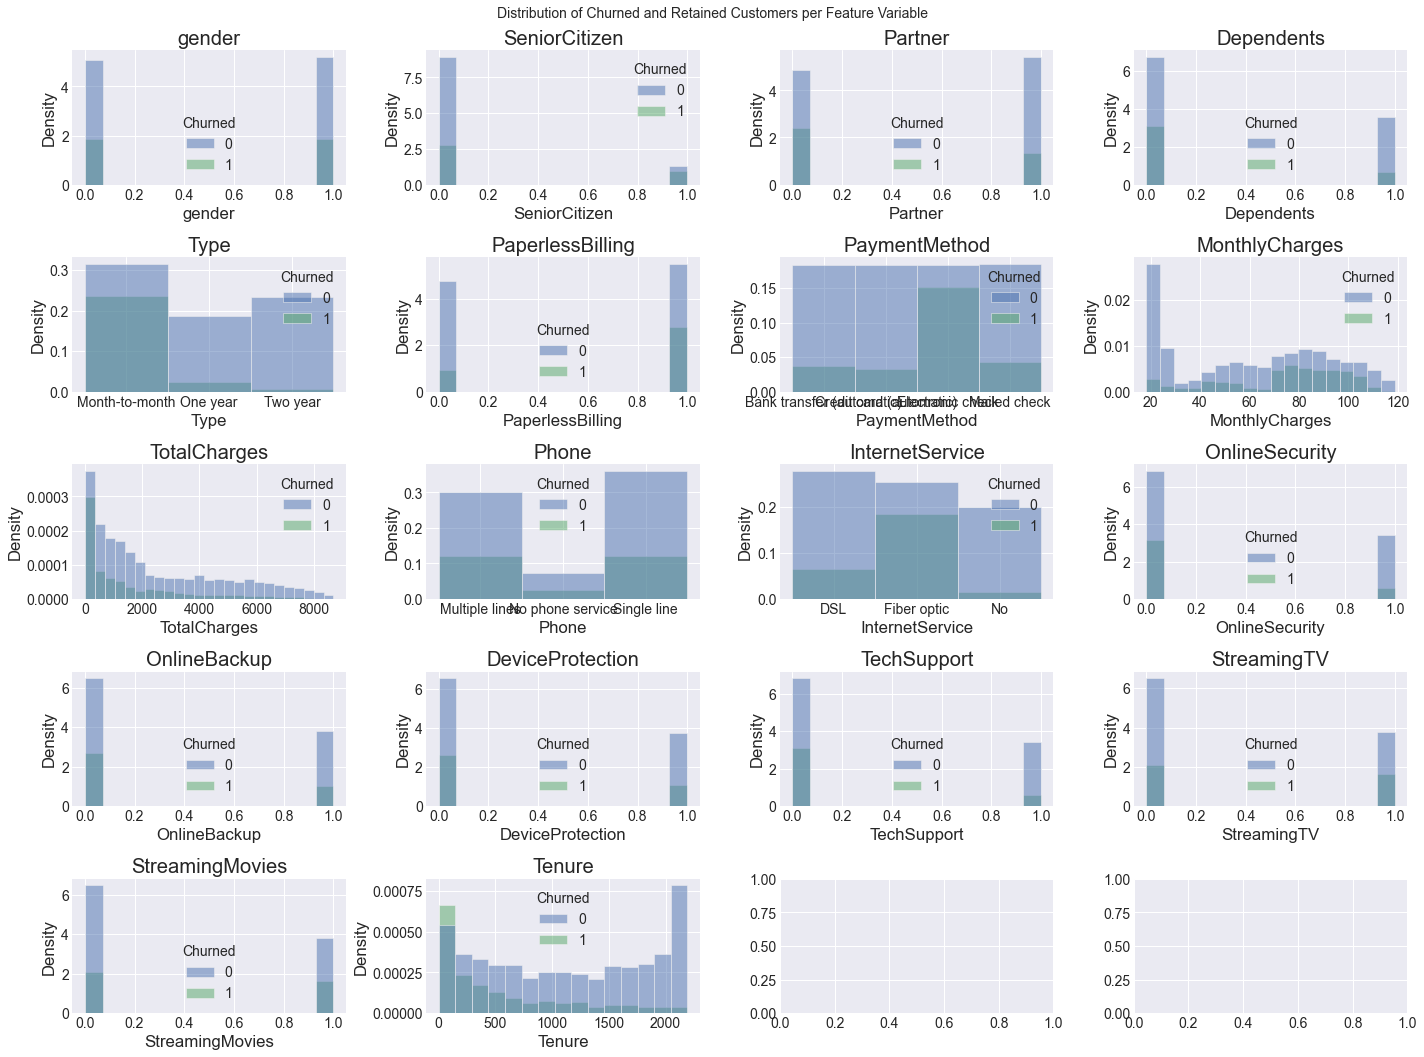

In [21]:
cols = list(data.drop(['Churned'], axis=1).columns) # training_data

fig, axes = plt.subplots(5, 4, figsize=(20, 15))
fig.suptitle("Distribution of Churned and Retained Customers per Feature Variable", fontsize=14)
axes = axes.flatten()

for col, ax in zip(cols, axes):
    sns.histplot(data, hue="Churned", x=col, stat='density', ax=ax) # training_data
    ax.set_title(col)

fig.tight_layout()
plt.show();

* 'MonthlyCharges' and "TotalCharges' do not show a normal distribution. They are both very right-skewed. 
* No outliers are observed.
* Most customers leave within the first five months of signing the contract ('Tenure').

* Customers who have churned are most prominently found in the following categories:
<br>1. Have a 'Month-to-Month' type of contract
<br>2. Pay by 'Electronic check' payment method
<br>3. Are connected to the internet service through 'Fiber optic' 
<br>4. Pay between 70-110 currency units in 'MonthlyCharges'
<br>5. Are in the lowest 'TotalCharges' paying group
<br>6. Are a senior citizen
<br>7. Have a partner
<br>8. Receive 'TechSupport' for the internet service
<br>9. Subscribe to the 'DeviceProtection' service
<br>10. Subscribe to the 'OnlineBackup' service
<br>11. Subscribe to the 'OnlineSecurity' service

A monetary element seems to lead to a higher propensity for churning, as well as perhaps an issue of technical service level. 

Let us take a closer look at categories 1-4 above against the 'Tenure'.

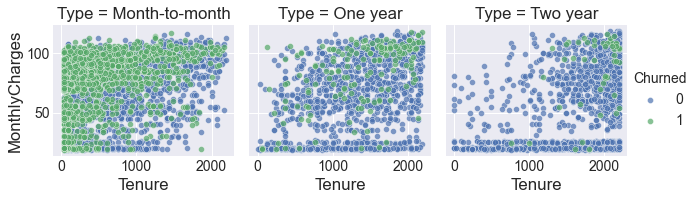

In [22]:
g = sns.FacetGrid(data=data, col="Type", hue="Churned") # training_data
g.map(sns.scatterplot, "Tenure", "MonthlyCharges", alpha=0.7)
g.add_legend();

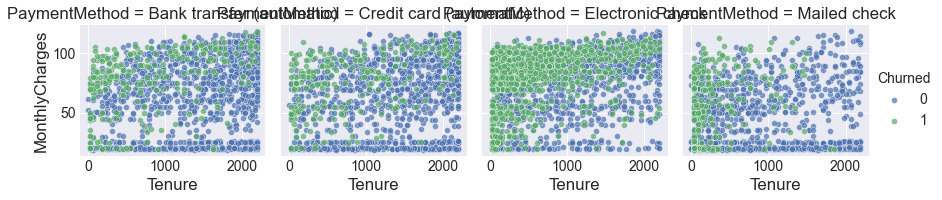

In [23]:
g = sns.FacetGrid(data=data, col="PaymentMethod", hue="Churned") # training_data
g.map(sns.scatterplot, "Tenure", "MonthlyCharges", alpha=0.7)
g.add_legend();

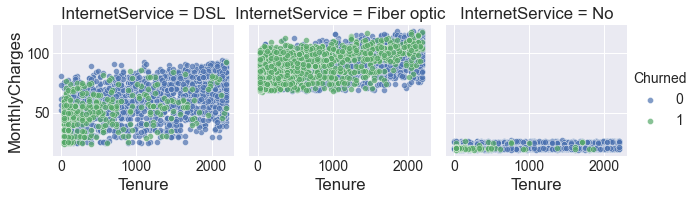

In [24]:
g = sns.FacetGrid(data=data, col="InternetService", hue="Churned") # training_data
g.map(sns.scatterplot, "Tenure", "MonthlyCharges", alpha=0.7)
g.add_legend();

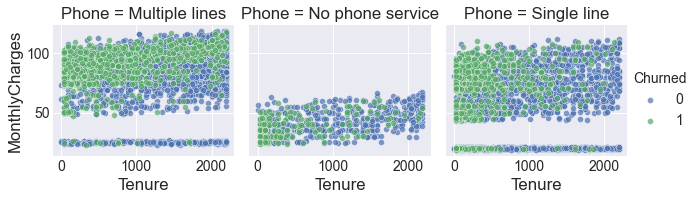

In [25]:
g = sns.FacetGrid(data=data, col="Phone", hue="Churned") # training_data
g.map(sns.scatterplot, "Tenure", "MonthlyCharges", alpha=0.7)
g.add_legend();

* The 'Month-to-Month' contract type, by far, has the vast majority of churned customers. Also for the other two contract types, the longer the tenure, the more number of customers find it difficult to keep up with the higher monthly payments and leave. 
* Seemingly, customers who are aware of how much they are paying every month tend to terminate the contract more than those who are not. Paying by 'Electronic check' and 'Mailed check' require the customers to go through a manual process of preparing the cheques, leading to a higher churning rate than among those who subscribed to the automatic payment methods of 'Bank transfer' and 'Credit card'. The longer the tenure, the payment has turned into a routine that the customers have gotten used to and they tend to stay on. 
* The monthly charges that include a subscription to internet service is up to 1.5 times and four times more expensive for 'Fiber optic', compared to 'DSL' and to having no internet service at all, respectively. The fiber optic technology provides a much faster internet connection than the traditional method, so it is usually sought after. However, since almost all the customers with the 'Fiber optic' internet service contract left Telecom, it may be indicative of poor service quality. 
* Having no phone is the cheapest option. Having 'Multiple lines' is slightly more expensive than having a 'Single line'. The churn rate is higher for 'Multiple lines' than 'Single line', and is higher for customers with a longer 'Tenure'.


Let us see how the feature variables affect the churn rate using the Generalised Linear Model Regression analysis.

In [26]:
glm_columns = [e for e in data.columns if e not in ['Churned']]
glm_columns = ' + '.join(map(str, glm_columns))
glm_model = smf.glm(formula=f'Churned ~ {glm_columns}', data=data, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Churned   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2912.5
Date:                Wed, 22 Dec 2021   Deviance:                       5824.9
Time:                        17:56:45   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2812
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

This shows that a customer is more likely to churn if s/he: 
* pays by PaymentMethod (Electronic check)
* uses InternetService (Fiber optic)
* is a SeniorCitizen
* uses PaperlessBilling
* uses MultipleLines
* subscribes to StreamingTV
* subscribes to StreamingMovies

Conversely, a customer is less likely to churn if s/he:
* is on a contract Type (T.One year) or Type (T.Two year)
* has no InternetService (No)
* subscribes to OnlineSecurity

In addition, 'Type' and 'TotalCharges' affect the churn rate to increase, and 'MonthlyCharges' and 'Tenure' affect the churn rate to decrease.  

We can also learn that the Intercept does not equal zero in the regression equation. 

Let us convert the remaining non-numeric variables to numeric so we can use analyses that require numeric variables. 

In [27]:
data['Phone'] = data['Phone'].map({'Multiple lines': 2, 'Single line': 1, 'No phone service': 0}).astype('int')
data['InternetService'] = data['InternetService'].map({'Fiber optic': 2, 'DSL': 1, 'No': 0}).astype('int')
data['Type'] = data['Type'].map({'Two year': 2, 'One year': 1, 'Month-to-month': 0}).astype('int')

We will apply one-hot-encoding to convert 'PaymentMethod' to a numeric variable. We will perform the conversion after we split dataset to training and test data subsets.  

Check for multilinearity between features. Since the variables do not show a normal distribution, we will specify the Spearman's correlation coefficient to be used instead of Pearson's. 

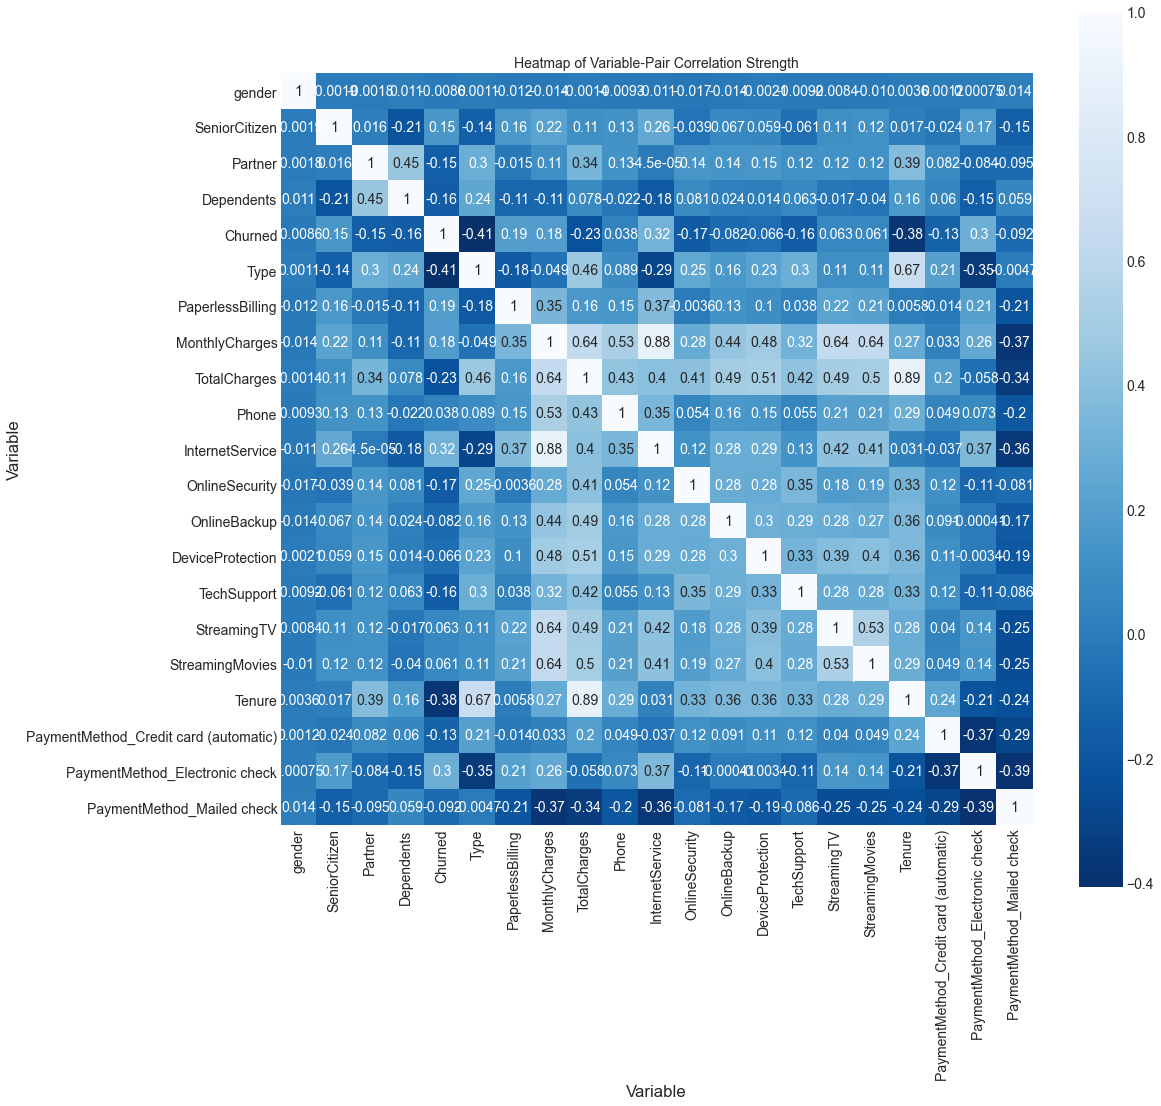

In [28]:
col = 'PaymentMethod'
data2 = pd.concat([data, pd.get_dummies(data[col], drop_first=True, prefix=col)], axis=1).drop([col], axis=1)

correlation = data2.corr('spearman')
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues_r') 
plt.title("Heatmap of Variable-Pair Correlation Strength", fontsize=14)
plt.ylabel("Variable")
plt.xlabel("Variable");

* There are no independent variables that show a strong correlation with the target variable.

* 'gender', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'StreamingTV' and 'StreamingMovies' all show an extremely weak correlation with 'Churned'. They do not seem to have significant predictive power. 

* The following feature-pairs show a strong to moderate correlation with each other, suggesting multicollinearity. 
<br>o 'InternetService' and 'MonthlyCharges' 
<br>o 'Tenure' and 'TotalCharges'
<br>o 'Type' and 'TotalCharges'
<br>o 'Tenure' and 'Type
<br>o 'StreamingTV' and 'MonthlyCharges'
<br>o 'StreamingMovies' and 'MonthlyCharges'

* We will start the model training and consider removing features as we check and improve the model performance. Considerations: 
<br>o 'Tenure' has a stronger negative correlation with 'Churned' than 'TotalCharges', indicating that 'Tenure' is more useful for predicting the target variable than 'TotalCharges'. 
<br>o 'TotalCharges' has a stronger correlation with other feature variables than 'Tenure' has, indicating a higher tendency for multicollinearity.

<br>In order to keep the model simple, our first choice is to use the logistic regression algorithm. But the model will perform poorly if the two classes are not linearly separable. 

Let us test for linear separability using SVM with a linear kernel and a hard margin for C to make the test rigorous. 

In [29]:
# split the training dataset into features and target variables and...
X = data2.drop(['Churned'], axis=1)
y = data2.Churned

# ...scale
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

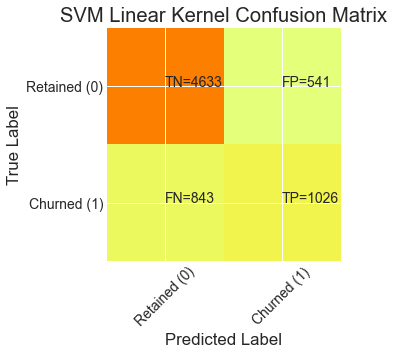

In [30]:
svm = SVC(C=1.0, kernel='linear', random_state=12345)
svm.fit(X_scaled, y)
pred = svm.predict(X_scaled)
cm = confusion_matrix(y, pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Retained (0)', 'Churned (1)']
plt.title('SVM Linear Kernel Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]

for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j])+"="+str(cm[i][j]))
plt.show();

FP and FN are not equal to zero, indicating that this is not a clear-cut case with a perfect linear separability and that the decision boundary is non-linear. There could be trouble ahead for our logistic regression model.

Let us find out which feature variables have predictive power. Dropping redundant variables will help reduce the noise in the data and the complexity of the model structure, and increase the model's interpretaility and generalisation capability. We will perform feature selection using a couple of techniques and choose an intersection. 

Since the majority of our data is categorical, let us use the Chi-squared test to perform feature selection. Our null hypothesis is that a feature variable and the target variable are independent. Our alternatie hypothesis is that the two variables are not independent.

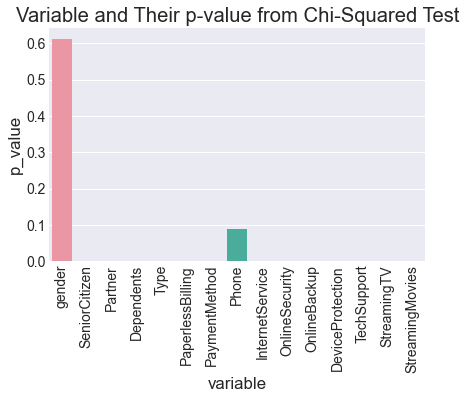

In [31]:
X_cat = data.drop(['MonthlyCharges', 'TotalCharges', 'Tenure', 'Churned'], axis=1)

encoder = OrdinalEncoder() 
X_cat = pd.DataFrame(encoder.fit_transform(X_cat), columns=X_cat.columns)

chi_scores = chi2(X_cat, y) # the default value of alpha, 0.05, is used

# create a table to show the variable name, chi-squared value and p-value
feature_selection = pd.DataFrame(columns=['variable', 'chi_square', 'p_value'])
feature_selection['variable'] = list(X_cat.columns)
feature_selection['chi_square'] = chi_scores[0]
feature_selection['p_value'] = chi_scores[1].round(5)
feature_selection.sort_values(by='p_value', ascending=False)

# plot a histogram for the p-values
sns.barplot(x="variable", y="p_value", data=feature_selection)
plt.title("Variable and Their p-value from Chi-Squared Test")
plt.xticks(rotation=90) 
plt.show();

The Chi-squared test indicates that 'gender' and 'Phone' do not have significant predictive power. 

Let us find out the important features using CatBoost.

In [32]:
y = data['Churned']
X = data.drop(['Churned'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345, stratify=data['Churned']) 

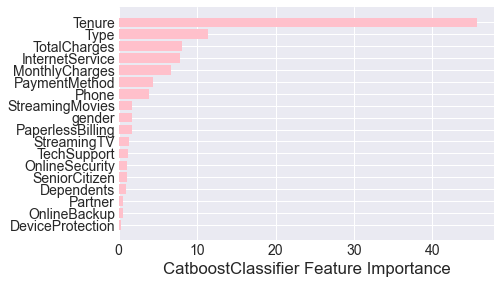

In [33]:
feature_names = list(X_train.columns)
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Type', 'PaperlessBilling', 'PaymentMethod', 'Phone', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

train_pool = Pool(X_train, y_train, feature_names=feature_names, cat_features=cat_features)
test_pool = Pool(X_test, y_test, feature_names=feature_names, cat_features=cat_features)

# handle the class imbalance
weights = (y_train == 0).sum() / (y_train == 1).sum()
cb_clf = CatBoostClassifier(scale_pos_weight = weights, random_seed=12345, verbose=0).fit(train_pool)
feature_importances = cb_clf.get_feature_importance()

cb_feature_importance = pd.DataFrame(list(zip(feature_names, feature_importances)), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=True)
plt.barh(cb_feature_importance['Feature'], cb_feature_importance['Importance'], color='pink')
plt.xlabel("CatboostClassifier Feature Importance")
plt.show();

* CatBoost concurs with our earlier analyses that 'Tenure', 'Type', 'TotalCharges', 'InternetService', 'MonthlyCharges' are the top five informative features.


To summarise,
* Feature variables suggested to be most important: 'Type', 'MonthlyCharges', 'TotalCharges', 'InternetService', 'PaymentMethod' and 'Phone' 
* Feature variables with little relevance or low contribution to prediction: 'gender', 'Phone' (None, Single line), 'customerID', 'BeginDate', 'EndDate2' ('Tenure' has been created to replace the latter two)
* Feature variables suspected of multicollinearity: 'Tenure' and 'TotalCharges'; 'InternetService' (Fiber optic) and 'MonthlyCharges'; 'InternetService' (No) and 'MonthlyCharges'


Armed with this information, let us start building some models and optimise their performance as necessary. 

Last but not least, check for complete duplicates. 

In [34]:
data.duplicated().sum()

18

The duplicates were caused by the removal of 'customerID'. It is not impossible to have two customers to have exactly the same contractual settings. We will not be removing them. 

To summarise, these are the datasets we have:
* X_train (6338, 18)
* y_train (6338,)
* X_test (705, 18)
* y_test (705,)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent EDA! Very thorough analysis and you made some really interesting observations. Although I would suggest postponing the exploration of feature importances until after the models are build, because feature importances are a function of the model: the feature that are important for one model in general need not be important for another model.

</div>

Data loading and preprocessing pipeline

In [35]:
def preprocess_data(df):
    
    # missing value mimputation and data type conversion
    # the OHE of 'PaymentMethod' is dealth with dynamically in the model training pipeline so as not to cause data leakage
    not_subscribed = ['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity']
    for col in not_subscribed:
        data[col] = (data[col] == 'Yes').astype('int').fillna(0)

    data = data.rename(columns={'MultipleLines': 'Phone'})
    data['Phone'] = data['Phone'].map({'Yes': 'Multiple lines', 'No': 'Single line'}).fillna('No phone service')

    data['TotalCharges'].fillna(0.0, inplace = True)

    data['EndDate2'] = ['2020-02-01' if x == 'No' else x for x in data['EndDate']]
    data[['EndDate2', 'BeginDate']] = data[['EndDate2', 'BeginDate']].apply(pd.to_datetime)
    data['Tenure'] = (data['EndDate2'] - data['BeginDate']).dt.days

    data['EndDate'] = [1 if x != 'No' else 0 for x in data['EndDate']]
    data.rename(columns = {'EndDate': 'Churned'}, inplace = True)

    to_binary = ['gender', 'Partner', 'Dependents', 'PaperlessBilling']
    for col in to_binary:
        data[col] = data[col].map({'Yes': 1, 'No': 0, 
                                  'Male': 1, 'Female': 0})

    to_category = ['Type', 'PaymentMethod', 'InternetService', 'Phone'] 
    for col in to_category:
        data[col] = data[col].fillna('No').astype('category')

    data['Phone'] = data['Phone'].map({'Multiple lines': 2, 'Single line': 1, 'No phone service': 0}).astype('int')
    data['InternetService'] = data['InternetService'].map({'Fiber optic': 2, 'DSL': 1, 'No': 0}).astype('int')
    data['Type'] = data['Type'].map({'Two year': 2, 'One year': 1, 'Month-to-month': 0}).astype('int')

    # split the data into training and test datasets
    y = data['Churned']
    X = data.drop(['Churned'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345, stratify=data['Churned']) 
    
    return X_train, X_test, y_train, y_test

<div class="alert alert-success">
<b>Reviewer's comment</b>

It's nice that you compiled all prerpocessing into one function!

</div>

## Model Building, Training, Optimisation and Evaluation

In [36]:
def evaluate(model, test_x, test_y, label_name):

    pred = model.predict(test_x)
    print(f"Accuracy Score: {accuracy_score(test_y, pred):.2f}")

    probs = model.predict_proba(test_x)[:,1]
    fpr, tpr, thresh = roc_curve(test_y, probs)
    auc = roc_auc_score(test_y, probs)
    print(f"AUC Score: {auc:.2f}")

    cm = confusion_matrix(test_y, pred)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    
    report = classification_report(test_y, pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    display(df_classification_report.round(2))

    tn, fp, fn, tp = confusion_matrix(test_y, pred).ravel()
    print(f"Retention correctly classified: {tn/(tn+fp):.2f}")
    print(f"Churn correctly classified: {tp/(tp+fn):.2f}")
    
    fig, axes = plt.subplots(1,2, figsize=(8,4))

    # plot the ROC curve
    ax = axes[0]
    ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %auc)
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.grid()
    ax.legend()

    # plot the precision-recall curve
    ax = axes[1]
    prec, rec, thresh2 = precision_recall_curve(test_y, probs)
    ax.plot(rec, prec, label=label_name)
    no_skill = len(test_y[test_y == 1]) / len(test_y)
    ax.plot([0, 1], [no_skill, no_skill], linestyle='--', lw=2, color='r', label='Random guess')
    ax.set_title('Precision-Recall curve')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.grid()
    ax.legend()

    plt.show();        

### Build a baseline model for the benchmark. 

Let us define the baseline. The dummy classifier generates predictions uniformly at random for each observation.

Accuracy Score: 0.73
AUC Score: 0.50


,precision,recall,f1-score,support
0,0.73,1.00,0.85,518.00
1,0.00,0.00,0.00,187.00
accuracy,0.73,0.73,0.73,0.73
macro avg,0.37,0.50,0.42,705.00
weighted avg,0.54,0.73,0.62,705.00


Retention correctly classified: 1.00
Churn correctly classified: 0.00


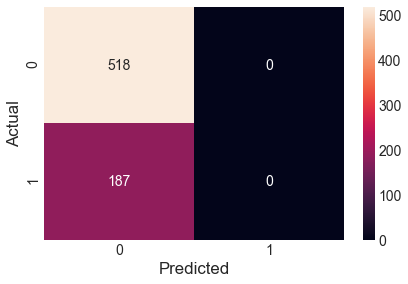

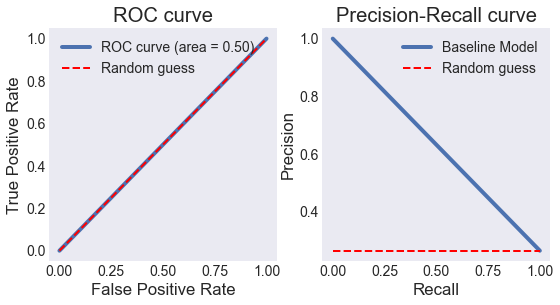

In [37]:
dummy_clf = DummyClassifier() 
dummy_clf.fit(X_train, y_train)
evaluate(dummy_clf, X_test, y_test, 'Baseline Model')

The models are expected to score this much in AUC and Accuracy scores at the least. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

It's good to have a baseline!

</div>

### Build models, train with cross validation, evaluate and optimise.

We have chosen:
* Logistic regression
* Random Forest
* CatBoost

There are more algorithms that can perform binary classification than those listed above (e.g. neural networks), but we would like to keep things as simple as possible so we will be able to explain to the management how the prediction mechanism works. We will put them through optimisation and see which one can get to the top score project threshold. 

Our overall goal is to achieve as high AUC and Accuracy scores as possible. Due to the class imbalance  in our dataset with retained customers outweighing churned customers by more than 2.5 times, however, the AUC and Accuracy scores will project the models' ability to classify the majority class. As we saw during the EDA, the decision boundary is not linear, and there is a "grey area" in the middle where the two classes intermingle, making the job of separating them more complicated. 

The presence of the "grey area" will manifest itself during the model training on the existing historical data as the models guess that a customer had churned when in fact s/he had not (false positives) and that a customer had not churned when in fact s/he had (false negatives). 

False negatives would cost InterConnect more than false positives. Given that a perfect classification score does not seem realistic due to the nature of the data, it will better to display promotional offers including to those with no intention of leaving. 

We will optimise the models' ability by balancing the false-positives-to-false-negatives ratio (i.e. recall), keeping false positives at bay as much as possible, and by incurring the least damage possible to precision.  


#### Evaluate the model’s performance using cross validation.

1. Plot an ROC curve, and calculate the AUC and Accuracy scores.
2. Supplement with a confusion matrix and a classification report, and understand the model’s classification ability segmentation. 
3. Plot a Precision-Recall curve to find an optimal threshold between precision and recall. 

<br>Repeat the below procedures for:
* Logistic regression
* Gradient Boosting
* Random Forest
* CatBoost

#### Optimise the model performance through:

1. threshold moving (logistic regression)
2. hyperparameter tuning
3. removing feature variables from the training and test datasets
4. finding the feature importance
5. upsampling
6. fix overfitting

#### Evaluate the optimised model on the test dataset. 

1. Calculate the AUC and Accuracy scores.
2. Choose the model with the highest AUC, Accuracy, precisino and recall scores. 

Outcomes: 
* Trained and tuned models
* A pipeline for an automated process of model training, hyperparameter tuning and performance evaluation

<div class="alert alert-success">
<b>Reviewer's comment</b>

The plan looks solid!

</div>

**Dataset Modifications**

Upsampling did not improve the model performance and downsampling decreased the model performance. In principle, it is not a good move since it does not reflect the reality of class imbalance, which the model needs to learn in order to handle the test dataset/real world data. 

In [94]:
# unsampling
upsampled = SMOTENC(categorical_features=[4, 6], random_state=12345)
#upsampled = SMOTE(random_state=12345)
X_train_up, y_train_up = upsampled.fit_resample(X_train, y_train)

In [95]:
# downsampling
y_train_down_one = y_train[y_train==1]
y_train_down_zero = y_train[y_train==0].sample(y_train_down_one.shape[0])
y_train_down = pd.concat([y_train_down_zero, y_train_down_one], axis=0)
X_train_down = X_train[X_train.index.isin(y_train_down.index)]

In [39]:
class create_dummies(TransformerMixin):

    def transform(self, X_df, **transformparams):
        return pd.get_dummies(X_df, drop_first=True).copy()

    def fit(self, X_df, y_df=None, **fitparams):
        return self

In [40]:
class drop_columns():
    def __init__(self,columns):
        self.columns=columns

    def transform(self, X ,y=None):
        return (pd.DataFrame(X).drop(self.columns,axis=1)).to_numpy()

    def fit(self, X, y=None):
        return self 

**Logistic Regression**

In [243]:
pipe = Pipeline([
    ('dummify', create_dummies()), # encoding
    #('scaler', MinMaxScaler(feature_range=(0, 1))), # feature scaling
    ('scaler', StandardScaler()), # feature scaling
    #('column_dropper', drop_columns([0, 1, 2])),
    ('lr', LogisticRegression(class_weight='balanced', random_state=12345, fit_intercept=True))
])

logistic_params = {
    'lr__penalty': ['l1', 'l2', 'elasticnet'],
    'lr__C': [0.1, 0.5, 1.0],
    'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'lr__tol': [1e-4, 1e-3, 1e-2],
    'lr__l1_ratio': [0.0, 0.1, 0.2, 0.3]
}

In [246]:
stratified_split = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
grid_lr = GridSearchCV(pipe, param_grid=logistic_params, scoring='roc_auc', refit='accuracy', cv=stratified_split)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12345, shuffle=True),
             estimator=Pipeline(steps=[('dummify',
                                        <__main__.create_dummies object at 0x000001F50120F8E0>),
                                       ('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=12345))]),
             param_grid={'lr__C': [0.1, 0.5, 1.0],
                         'lr__l1_ratio': [0.0, 0.1, 0.2, 0.3],
                         'lr__penalty': ['l1', 'l2', 'elasticnet'],
                         'lr__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                        'saga'],
                         'lr__tol': [0.0001, 0.001, 0.01]},
             refit='accuracy', scoring='roc_auc')

= Training =
Accuracy Score: 0.75
AUC Score: 0.85


,precision,recall,f1-score,support
0,0.91,0.73,0.81,4656.00
1,0.52,0.81,0.63,1682.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.72,0.77,0.72,6338.00
weighted avg,0.81,0.75,0.77,6338.00


Retention correctly classified: 0.73
Churn correctly classified: 0.81


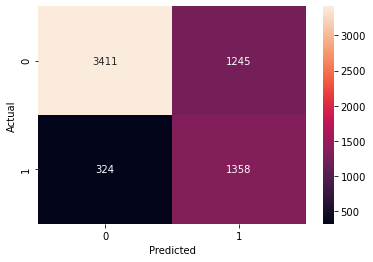

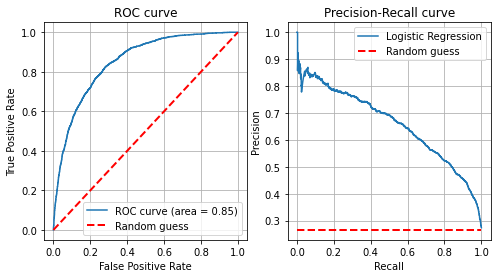

= Test =
Accuracy Score: 0.74
AUC Score: 0.83


,precision,recall,f1-score,support
0,0.91,0.72,0.80,518.00
1,0.51,0.80,0.62,187.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.71,0.76,0.71,705.00
weighted avg,0.80,0.74,0.75,705.00


Retention correctly classified: 0.72
Churn correctly classified: 0.80


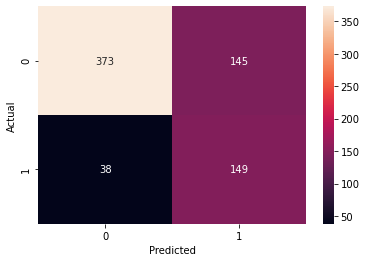

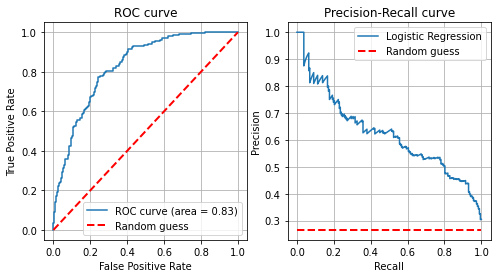

In [269]:
print('= Training =')
evaluate(grid_lr, X_train, y_train, 'Logistic Regression')
print('= Test =')
evaluate(grid_lr, X_test, y_test, 'Logistic Regression')

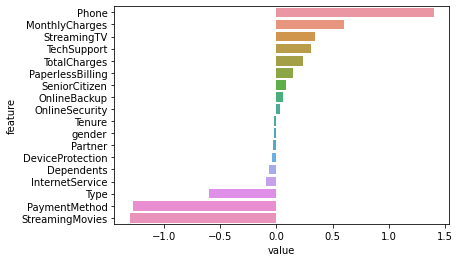

In [284]:
feature_names = list(X_train.columns)
feature_coefs = grid_lr.best_estimator_['lr'].coef_.flatten()
zipped = pd.DataFrame(zip(feature_names, feature_coefs), columns = ['feature', 'value']).sort_values(by='value', ascending=False)
sns.barplot(data=zipped, x="value", y="feature");

* The model does not seem to be overfitting the training data too much since the AUC and Accuracy scores for training and test datasets are only failry close. 
* The hyperparameter optimisation did not find a set of parameters more optimal that improves the scores.

**GradientBoosting Classifier**

In [259]:
def objective(trial, X_df, y_df):
    
    gb__learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)
    gb__n_estimators = trial.suggest_int('n_estimators', 50, 500) # 200
    gb__criterion = trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error', 'mse', 'mae'])
    gb__max_depth = trial.suggest_int('max_depth', 1, 9) # 5
    gb__tol = trial.suggest_float('tol', 0.0001, 0.1)
    gb__min_samples_split = trial.suggest_int('min_samples_split', 3, 10)
    gb__min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 5)
    
    params = {
        'learning_rate': gb__learning_rate,
        'n_estimators': gb__n_estimators,
        'criterion': gb__criterion, 
        'max_depth': gb__max_depth,
        'tol': gb__tol,
        'min_samples_split': gb__min_samples_split,
        'min_samples_leaf': gb__min_samples_leaf
    }

    gb_pipe = Pipeline([
        ('dummify', create_dummies()), # encoding
        ('scaler', MinMaxScaler()),
        ('column_dropper', drop_columns([1, 2, 3, 8, 9, 10, 11])), 
        ('model', GradientBoostingClassifier(**params, random_state=12345))
    ])
    
    stratified_split = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
    gb_cv_results = cross_val_score(gb_pipe, X_df, y_df, cv=stratified_split, scoring='roc_auc')
    return np.nanmean(gb_cv_results)

In [258]:
study = optuna.create_study(direction="maximize", study_name="GradientBoost")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=10)

[I 2021-12-20 16:24:33,220] A new study created in memory with name: GradientBoost
[I 2021-12-20 16:24:58,850] Trial 0 finished with value: 0.8821118544824825 and parameters: {'learning_rate': 0.8011651324427581, 'n_estimators': 302, 'criterion': 'squared_error', 'max_depth': 8, 'tol': 0.08606604738452651, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8821118544824825.
[I 2021-12-20 16:25:08,503] Trial 1 finished with value: 0.9055693215665089 and parameters: {'learning_rate': 0.12259717453173972, 'n_estimators': 433, 'criterion': 'friedman_mse', 'max_depth': 2, 'tol': 0.05674327094462405, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9055693215665089.
[I 2021-12-20 16:25:10,434] Trial 2 finished with value: 0.8971863918181648 and parameters: {'learning_rate': 0.5427290902005889, 'n_estimators': 56, 'criterion': 'friedman_mse', 'max_depth': 3, 'tol': 0.010305249895925192, 'min_samples_split': 10, 'min_samples_leaf': 4}. B

In [260]:
print(f"\tBest value (AUC Score): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (AUC Score): 0.90557
	Best params:
		learning_rate: 0.12259717453173972
		n_estimators: 433
		criterion: friedman_mse
		max_depth: 2
		tol: 0.05674327094462405
		min_samples_split: 10
		min_samples_leaf: 5


In [381]:
gb_pipe = Pipeline([
    ('dummify', create_dummies()), # encoding
    ('scaler', MinMaxScaler()), # feature scaling
    ('column_dropper', drop_columns([1, 2, 3, 8, 9, 10, 11])),
    ('model', GradientBoostingClassifier(random_state=12345,
                                         learning_rate=0.2, 
                                         n_estimators=300, 
                                         criterion='friedman_mse',
                                         max_depth=8, 
                                         min_samples_split=500,
                                         min_samples_leaf=40, 
                                         max_features=8,
                                         tol=0.05674327094462405
                                        ))
])

gb_pipe.fit(X_train, y_train)

Pipeline(steps=[('dummify',
                 <__main__.create_dummies object at 0x000001F50BB43C10>),
                ('scaler', MinMaxScaler()),
                ('column_dropper',
                 <__main__.drop_columns object at 0x000001F50BB435B0>),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=8,
                                            max_features=8, min_samples_leaf=40,
                                            min_samples_split=500,
                                            n_estimators=300,
                                            random_state=12345,
                                            tol=0.05674327094462405))])

= Training =
Accuracy Score: 0.95
AUC Score: 0.99


,precision,recall,f1-score,support
0,0.95,0.98,0.96,4656.00
1,0.94,0.85,0.89,1682.00
accuracy,0.95,0.95,0.95,0.95
macro avg,0.94,0.92,0.93,6338.00
weighted avg,0.95,0.95,0.95,6338.00


Retention correctly classified: 0.98
Churn correctly classified: 0.85


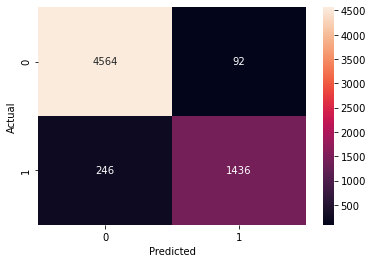

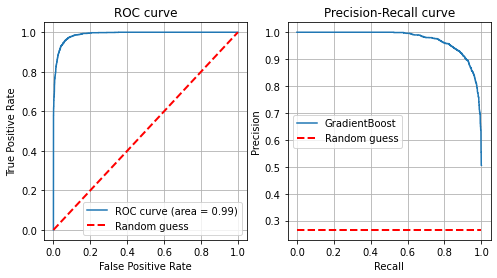

= Test =
Accuracy Score: 0.86
AUC Score: 0.90


,precision,recall,f1-score,support
0,0.88,0.94,0.91,518.00
1,0.79,0.64,0.71,187.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.83,0.79,0.81,705.00
weighted avg,0.86,0.86,0.85,705.00


Retention correctly classified: 0.94
Churn correctly classified: 0.64


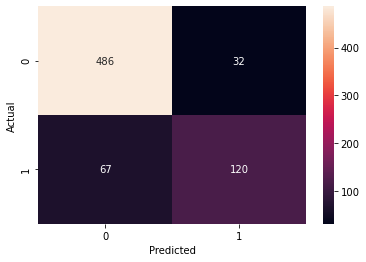

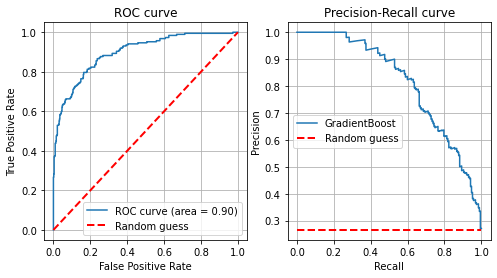

In [382]:
print('= Training =')
evaluate(gb_pipe, X_train, y_train, 'GradientBoost')
print('= Test =')
evaluate(gb_pipe, X_test, y_test, 'GradientBoost')

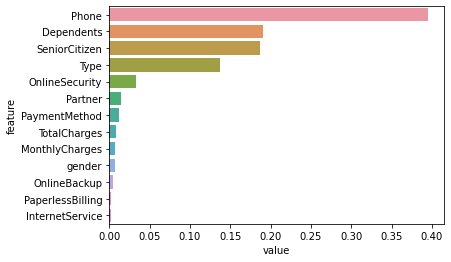

In [305]:
feature_names = list(X_train.columns)
feature_importances = gb_pipe.named_steps['model'].feature_importances_.flatten()
zipped = pd.DataFrame(zip(feature_names, feature_importances), columns = ['feature', 'value']).sort_values(by='value', ascending=False)
sns.barplot(data=zipped, x="value", y="feature");

* The hyperparameter optimisation was a little more effective when done manually than when done automatically than Optuna.

**RandomForest Classifier**

In [265]:
pipe = Pipeline([
    ('dummify', create_dummies()), # encoding
    #('scaler', MinMaxScaler(feature_range=(0, 1))), # feature scaling
    ('scaler', StandardScaler()), # feature scaling
    #('column_dropper', drop_columns([0, 1, 2])),
    ('rf', RandomForestClassifier(random_state=12345, class_weight='balanced', n_jobs=-1))
])

randomforest_params = {
    'rf__min_samples_split': [3, 5, 10], 
    'rf__n_estimators' : [100, 300],
    'rf__max_depth': [3, 5, 15, 25],
    'rf__max_features': [3, 5, 10, 20]
}

In [266]:
stratified_split = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
grid_rf = GridSearchCV(pipe, param_grid=randomforest_params, scoring='roc_auc', refit='accuracy', cv=stratified_split)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12345, shuffle=True),
             estimator=Pipeline(steps=[('dummify',
                                        <__main__.create_dummies object at 0x000001F575B915B0>),
                                       ('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                                               random_state=12345))]),
             param_grid={'rf__max_depth': [3, 5, 15, 25],
                         'rf__max_features': [3, 5, 10, 20],
                         'rf__min_samples_split': [3, 5, 10],
                         'rf__n_estimators': [100, 300]},
             refit='accuracy', scoring='roc_auc')

= Training =
Accuracy Score: 0.79
AUC Score: 0.88


,precision,recall,f1-score,support
0,0.91,0.80,0.85,4656.00
1,0.58,0.78,0.67,1682.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.75,0.79,0.76,6338.00
weighted avg,0.82,0.79,0.80,6338.00


Retention correctly classified: 0.80
Churn correctly classified: 0.78


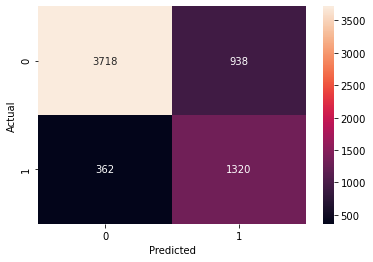

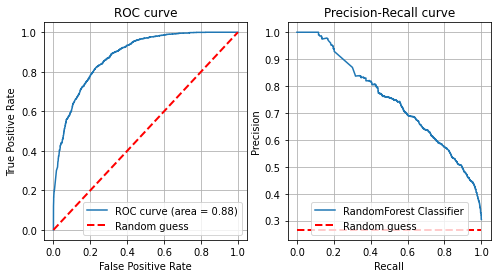

= Test =
Accuracy Score: 0.78
AUC Score: 0.85


,precision,recall,f1-score,support
0,0.89,0.79,0.84,518.00
1,0.56,0.73,0.63,187.00
accuracy,0.78,0.78,0.78,0.78
macro avg,0.72,0.76,0.74,705.00
weighted avg,0.80,0.78,0.78,705.00


Retention correctly classified: 0.79
Churn correctly classified: 0.73


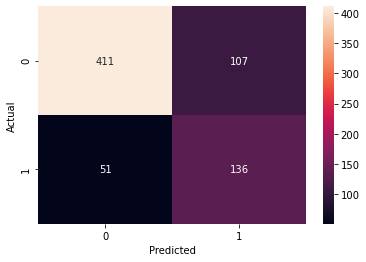

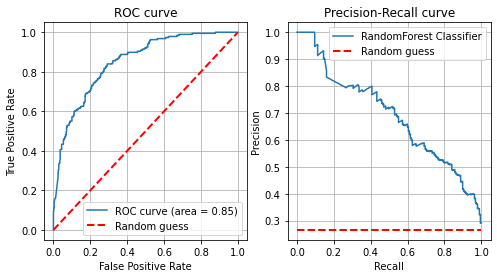

In [383]:
print('= Training =')
evaluate(grid_rf, X_train, y_train, 'RandomForest Classifier')
print('= Test =')
evaluate(grid_rf, X_test, y_test, 'RandomForest Classifier')

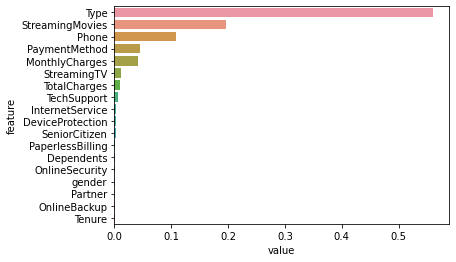

In [386]:
feature_names = list(X_train.columns)
feature_importances = grid_rf.best_estimator_['rf'].feature_importances_.flatten()
zipped = pd.DataFrame(zip(feature_names, feature_importances), columns = ['feature', 'value']).sort_values(by='value', ascending=False)
sns.barplot(data=zipped, x="value", y="feature");

* RandomForest Classifer was one of the easier algorithms to work with to achieve good scores. 

**CatBoostClassifier**

In [38]:
feature_names = list(X_train.columns)
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Type', 'PaperlessBilling', 'PaymentMethod', 'Phone', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

train_pool = Pool(X_train, y_train, feature_names=feature_names, cat_features=cat_features)
test_pool = Pool(X_test, y_test, feature_names=feature_names, cat_features=cat_features)

# handle the class imbalance
weights = (y_train == 0).sum() / (y_train == 1).sum()

cb_clf_cv = CatBoostClassifier(scale_pos_weight = weights, random_seed=12345)

param_distribution = {
    'learning_rate': [0.03, 0.1, 0.2], 
    'l2_leaf_reg': [5, 6, 7, 8, 9, 10], 
    'depth': [4, 6, 10, 20], 
    'iterations':[100, 200, 300]
}

randomized_search_results = cb_clf_cv.randomized_search(
    param_distribution,
    train_pool,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6293406	test: 0.6343791	best: 0.6343791 (0)	total: 17.5ms	remaining: 5.22s
1:	learn: 0.5806767	test: 0.5900118	best: 0.5900118 (1)	total: 38.2ms	remaining: 5.69s
2:	learn: 0.5493426	test: 0.5642933	best: 0.5642933 (2)	total: 54.6ms	remaining: 5.4s
3:	learn: 0.5229585	test: 0.5404254	best: 0.5404254 (3)	total: 75.4ms	remaining: 5.58s
4:	learn: 0.5060428	test: 0.5254178	best: 0.5254178 (4)	total: 95.2ms	remaining: 5.61s
5:	learn: 0.4969811	test: 0.5176945	best: 0.5176945 (5)	total: 111ms	remaining: 5.45s
6:	learn: 0.4912344	test: 0.5141746	best: 0.5141746 (6)	total: 129ms	remaining: 5.38s
7:	learn: 0.4798463	test: 0.5051259	best: 0.5051259 (7)	total: 147ms	remaining: 5.38s
8:	learn: 0.4770321	test: 0.5019501	best: 0.5019501 (8)	total: 171ms	remaining: 5.53s
9:	learn: 0.4723320	test: 0.4981707	best: 0.4981707 (9)	total: 192ms	remaining: 5.58s
10:	learn: 0.4690129	test: 0.4946370	best: 0.4946370 (10)	total: 211ms	remaining: 5.55s
11:	learn: 0.4657992	test: 0.4943798	best: 0.494

= Training =
Accuracy Score: 0.88
AUC Score: 0.96


,precision,recall,f1-score,support
0,0.97,0.87,0.92,4656.00
1,0.72,0.91,0.81,1682.00
accuracy,0.88,0.88,0.88,0.88
macro avg,0.84,0.89,0.86,6338.00
weighted avg,0.90,0.88,0.89,6338.00


Retention correctly classified: 0.87
Churn correctly classified: 0.91


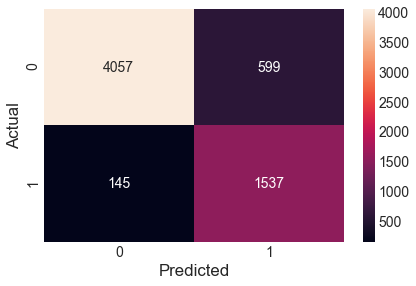

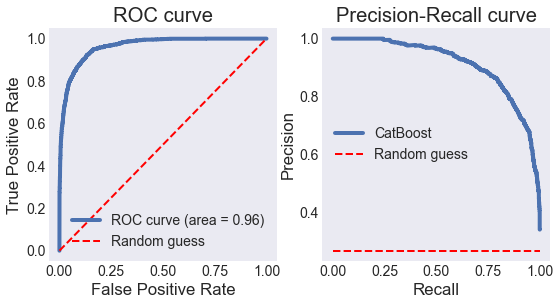

= Test =
Accuracy Score: 0.83
AUC Score: 0.91


,precision,recall,f1-score,support
0,0.93,0.84,0.88,518.00
1,0.65,0.81,0.72,187.00
accuracy,0.83,0.83,0.83,0.83
macro avg,0.79,0.83,0.80,705.00
weighted avg,0.85,0.83,0.84,705.00


Retention correctly classified: 0.84
Churn correctly classified: 0.81


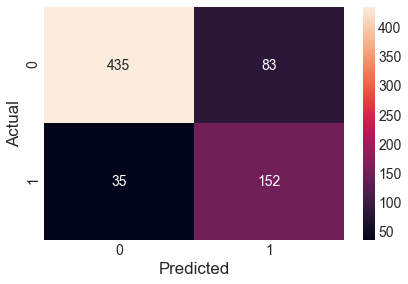

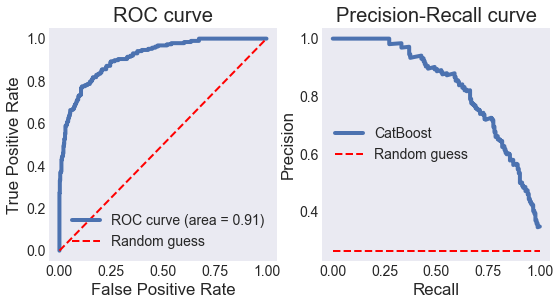

In [39]:
print('= Training =')
evaluate(cb_clf_cv, X_train, y_train, 'CatBoost')
print('= Test =')
evaluate(cb_clf_cv, X_test, y_test, 'CatBoost')

In [40]:
# print out the parameters that give the best value of the loss function
cb_clf_cv.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 300,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 5,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prio

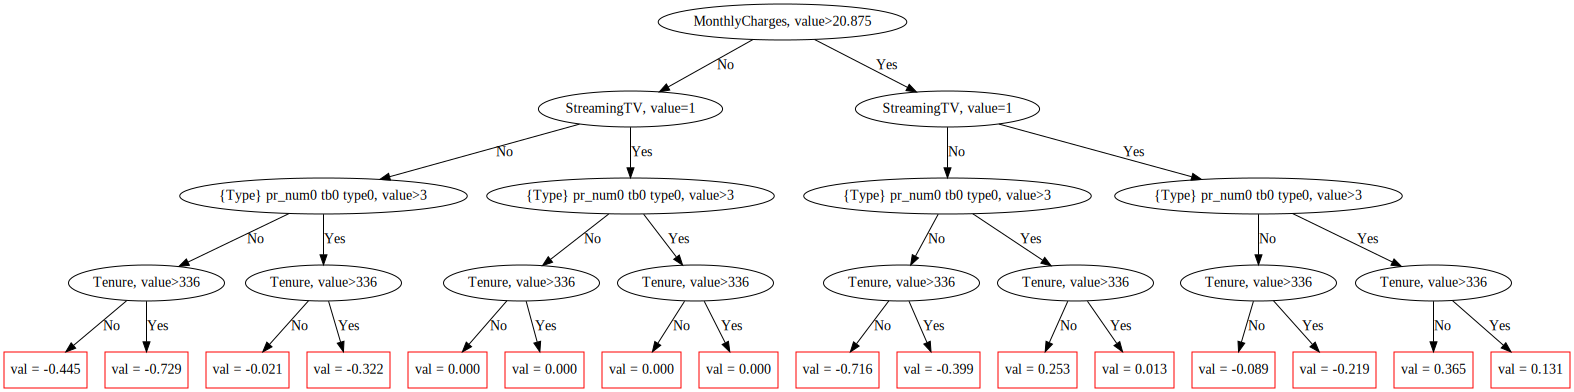

In [43]:
cb_clf_cv.plot_tree(tree_idx=0, pool=test_pool)

* CatBoost was by far the easiest to work with, and also achieved the best score. The model shows a sign of overfitting the training data, and can be tuned further. 

### Conclusion

The score board looks as below.

| 		| 	Model Performance on Training Dataset	| 		| 		| 		| 	Model Performance on Test Dataset	| 		| 		| 		| 
|----------		|----------		|----------		|----------		|----------		|----------		|----------		|----------		|----------		| 
| 	Algorithm	| 	AUC Score	| 	Accuracy Score	| 	Retention Correctly Classified	| 	Churn Correctly Classified	| 	AUC Score	 | 	Accuracy Score	 | 	Retention Correctly Classified	 | 	Churn Correctly Classified	 |
|----------		|----------		|----------		|----------		|----------		|----------		|----------		|----------		|----------		 |
| 	Logistic Regression	| 	0.85	| 	0.75	| 	0.73	| 	0.81	| 	0.83	 | 	0.74	 | 	0.72	 | 	0.80	 |
| 	Gradient Boosting Classifier	| 	0.99	| 	0.95	| 	0.98	| 	0.85	| 	0.90	 | 	0.86	 | 	0.94	 | 	0.64	 |
| 	RandomForest Classifier	| 	0.88	| 	0.79	| 	0.80	| 	0.78	| 	0.85	 | 	0.78	 | 	0.79	 | 	0.73	 |
| 	CatBoost Classifier	| 	0.96	| 	0.88	| 	0.87	| 	0.91	| 	0.91	 | 	0.83	 | 	0.84	 | 	0.81	 |

CatBoost performed the best overall at identifying customers with a churning potential. Despite the binary classification problem having a non-linear decision boundary, Linear Regression did not do bad at all either. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

The modeling section is great! You tried a few different models, tuned hyperparameters using a cross-validated grid search and evaluated the final models on the test set. The results are excellent!

</div>

# Solution Report

The Project Instruction stated that our model performance was being evaluated by the AUC and Accuracy scores. We had an imbalanced dataset, and the AUC score was going to indicate the model’s performance on classifying the positive class (the customers who churned), and the Accuracy score, the majority class, i.e. the negative class (the customers who did not churn, i.e. retained). 

The confusion matrix was brought in to supplement the evaluation metrics and provide absolute numbers: the number of customers correctly classified as ‘churned’ (True Positives) and the number of customers correctly classified as ‘retained’ (True Negatives); and the number of customers incorrectly classified as ‘churned’ (False Positives) and the number of customers incorrectly classified as ‘retained’ (False Negatives). 

False Negatives would cost the company more than False Positives; it would be cheaper to “waste” promotional offers on customers who had no intention of leaving InterConnect anyway (False Positives) than to fail at spotting those who were going to leave the company (False Negatives). We saw from the linear separability test that the decision boundary was non-linear, and understood that our goals were to minimise False Negatives and reduce False Positives even further, while doing our best to achieve the highest number of True Positives and True Negatives as possible. 

All the steps described in the plan were performed in search of ever-higher scores, but not all of them were effective. Focusing only on the negative issues, 
* In the Logistic Regression model, the precision for the positive class stayed low (51%). Various attempts at calibrating the threshold to tip the balance between the True Positive Rate and the False Positive Rate were not successful. Downsampling the majority negative class had a large negative effect on the model’s performance. Augmenting the minority positive class through upsampling had no effect on improving the model’s performance. Dropping some non-contributing features had little to no effect on the model’s performance either. 
* Hyperparameter optimisation by automated means did not produce favourable results. In the end, the hyperparameter tuning by hand was what improved the recall of the minority positive class, though it still stayed lower than desired (64%). 
* Despite the use of various tactics, the overfitting in the CatBoost Classifier model could not be reduced further (a difference of 0.05 in the AUC and Accuracy scores between the training and test performances). 

On the bright side, there were success stories, too. 
* In the Logistic Regression model, GridSearchCV managed to find a point of balance through various regularization methods, and came up with a model that is least overfitted of the four. 
* Hyperparameter optimisation of the Gradient Boosting Classifier by GridSearchCV was not feasible in terms of time cost. Using Optuna cut the process time by several folds. 
* The RandomForest Classifier is another model with less overfitting. 
* The baseline CatBoost Classifier model was quick to produce the highest scores all around with minimum data preprocessing.  

The dataset for this project was somewhat different from the dataset for all the projects we had encountered on the course. 
* One article on the internet put forward a very convincing argument that the dataset should be split before starting the EDA so as not to cause data leakage. It turned out to be the biggest reason for all the models not being able to break beyond a 0.84 score mark.
* Interpreting correctly what caused the NaN value in each variable after all the csv files were merged was crucial. In particular, ‘MultipleLines” in phone.csv was tricky.
* The dataset was very sensitive to every little thing: automatic one-hot-encoding or manual labeling, standard scaling or min-max scaling, the proportion of split into training and test datasets, just to mention a few.  

Both data preprocessing and modeling went through countless trials and errors. 

The Logistic Regression model is the easiest to explain, but the CatBoost model scored the top in AUC and Accuracy on the unseen data, and more importantly, has the lowest number of False Negatives, which is less than the number of False Positives, satisfying our business objectives: 
* AUC Score: 0.91
* Accuracy Score: 0.83
* Retention correctly classified: 0.84
* Churn correctly classified: 0.81
* Number of False Positives: 83
* Number of False Negatives: 35

![CatBoost Confusion Matrix on Test Dataset](catboost_test_confusion_matrix.png "CatBoost Confusion Matrix on Test Dataset")

The model's classification accuracy at 95% confidence interval is shown below:

In [1]:
from statsmodels.stats.proportion import proportion_confint
lower_c, upper_c = proportion_confint(81, 100, 0.05)
lower_r, upper_r = proportion_confint(84, 100, 0.05)
print("Model's classification accuracy at 95% confidence interval for:")
print(f"- churn is between {lower_c:.2f}% and {upper_c:.2f}%")
print(f"- retention is between {lower_r:.2f}% and {upper_r:.2f}%")

Model's classification accuracy at 95% confidence interval for:
- churn is between 0.73% and 0.89%
- retention is between 0.77% and 0.91%
